<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inspection" data-toc-modified-id="Inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inspection</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#CSVs-and-Preprocessing" data-toc-modified-id="CSVs-and-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>CSVs and Preprocessing</a></span></li><li><span><a href="#Holidays" data-toc-modified-id="Holidays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Holidays</a></span><ul class="toc-item"><li><span><a href="#Sales" data-toc-modified-id="Sales-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Sales</a></span></li><li><span><a href="#Pre_R" data-toc-modified-id="Pre_R-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Pre_R</a></span></li></ul></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Residuals</a></span><ul class="toc-item"><li><span><a href="#AutoReg" data-toc-modified-id="AutoReg-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>AutoReg</a></span></li></ul></li><li><span><a href="#Final-models" data-toc-modified-id="Final-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final models</a></span></li></ul></div>

# Inspection

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import datetime
rcParams["figure.figsize"] = 10, 6

import warnings
warnings.filterwarnings("ignore")



## CSVs and Preprocessing

In [3]:
#stores = pd.read_csv("../data/store.csv", low_memory=False)
#stores.head()

In [4]:
train = pd.read_csv("../data/train.csv", low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
#train.set_index('Date', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [5]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
#creating timeseries of date

train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
sales = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'])

sales.columns=['ds','y'] 
sales.head()

,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [7]:
sales_m = sales.copy()

sales_m['ds'] = sales_m['ds'].apply(lambda x: x.strftime('%Y-%m'))
sales_m['ds'] = pd.to_datetime(sales_m['ds'])

sales_m = sales_m.groupby('ds').sum()
sales_m.reset_index(inplace = True)

sales_m.columns=['ds','y'] 
sales_m.head()


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063


In [8]:
indexed_sales_m = sales_m.set_index('ds')
Pre_R_m = indexed_sales_m.loc['2012-12-30':'2014-06-30']
Pre_R_m.reset_index(inplace = True)
Pre_R_m


,ds,y
0,2013-01-01,180132207
1,2013-02-01,171534275
2,2013-03-01,201180369
3,2013-04-01,183431432
4,2013-05-01,185411063
5,2013-06-01,180702351
6,2013-07-01,208843882
7,2013-08-01,198042727
8,2013-09-01,178053963
9,2013-10-01,187662330


In [9]:
indexed_sales = sales.set_index('ds')
Pre_R = indexed_sales.loc['2013-01-01':'2014-06-30']
Pre_R.reset_index(inplace = True)
Pre_R


,ds,y
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
541,2014-06-26,5802491
542,2014-06-27,6910940
543,2014-06-28,6586535
544,2014-06-29,257513


In [160]:
residual_df = pd.read_csv("../data/residual.csv")
residual_m_df = pd.read_csv("../data/residual_m.csv")
residual = pd.read_csv("../data/residual.csv")
residual_m = pd.read_csv("../data/residual_m.csv")


residual['ds'] = pd.to_datetime(residual['ds'])
residual_m['ds'] = pd.to_datetime(residual_m['ds'])

residual.set_index('ds', inplace=True)
residual_m.set_index('ds', inplace=True)

## Holidays

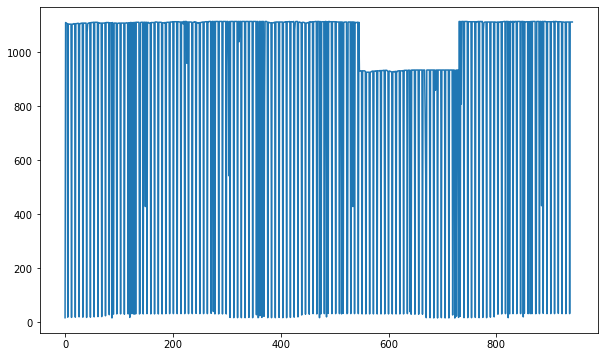

In [11]:
plt.plot(train['Open'])

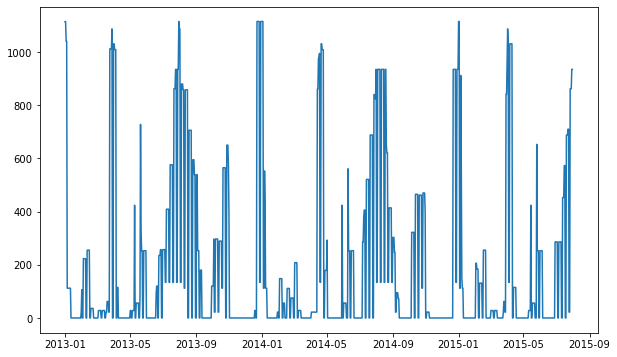

In [12]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
season = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'Sales'])

season.columns=['ds','y'] 
season_indexed = season.copy()
season_indexed['ds'] = pd.to_datetime(season_indexed['ds'])
season_indexed.set_index('ds', inplace=True)
season_indexed.head()

plt.plot(season_indexed)

### Sales

In [13]:
holidays = season[season['y'] > 0]
holidays.reset_index(inplace=True, drop = True)
holidays.columns= ['ds','holiday']
list_holidays = holidays["holiday"].to_list()
binned_holidays = []
for i in list_holidays:
    if i < 251:
        binned_holidays.append('250')
    if i > 250 and i < 501:
        binned_holidays.append('500')
    if i > 500 and i < 751:
        binned_holidays.append('750')
    if i > 750:
        binned_holidays.append('1000')
binned_holidays

holidays["holiday"] = binned_holidays

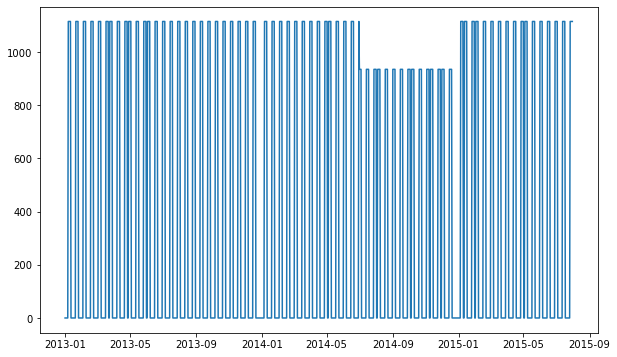

In [14]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])

promo.columns=['ds','y'] 
promo_indexed = promo.copy()
promo_indexed['ds'] = pd.to_datetime(promo_indexed['ds'])
promo_indexed.set_index('ds', inplace=True)
promo_indexed.head()

plt.plot(promo_indexed)

In [15]:
promo = promo[promo['y'] > 0]
promo.reset_index(inplace=True, drop = True)
promo.columns= ['ds','holiday']
list_promo = promo["holiday"].to_list()
binned_promo = []
for i in list_promo:
    if i > 0:
        binned_promo.append('promo')


promo["holiday"] = binned_promo

In [16]:
holidays = pd.concat((holidays, promo))
holidays

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
355,2015-07-27,promo
356,2015-07-28,promo
357,2015-07-29,promo
358,2015-07-30,promo


### Pre_R

In [17]:
season_Pre_R = season.set_index('ds')
holidays_Pre_R = season_Pre_R.loc['2012-12-30':'2014-06-30']
holidays_Pre_R.reset_index(inplace = True)
holidays_Pre_R.head()

,ds,y
0,2013-01-01,1114
1,2013-01-02,1115
2,2013-01-03,1040
3,2013-01-04,1040
4,2013-01-05,112


In [18]:


holidays_Pre_R = holidays_Pre_R[holidays_Pre_R['y'] > 0]
holidays_Pre_R.reset_index(inplace=True, drop = True)
holidays_Pre_R.columns= ['ds','holiday']
list_holidays_Pre_R = holidays_Pre_R["holiday"].to_list()
binned_holidays_Pre_R = []
for i in list_holidays_Pre_R:
    if i < 251:
        binned_holidays_Pre_R.append('250')
    if i > 250 and i < 501:
        binned_holidays_Pre_R.append('500')
    if i > 500 and i < 751:
        binned_holidays_Pre_R.append('750')
    if i > 750:
        binned_holidays_Pre_R.append('1000')
#    if i > 0:
#        binned_holidays_Pre_R.append('school')


binned_holidays_Pre_R

holidays_Pre_R["holiday"] = binned_holidays_Pre_R
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
272,2014-06-16,500
273,2014-06-17,500
274,2014-06-18,500
275,2014-06-19,500


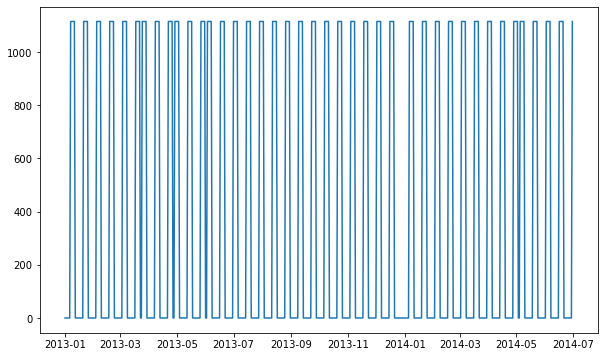

In [19]:
train = train.groupby('Date').sum()
#sales = sales.to_frame()
train.reset_index(inplace = True)
promo_Pre_R = train.drop(columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'SchoolHoliday',
       'Sales'])
promo_Pre_R = promo_Pre_R.set_index('Date')
promo_Pre_R = promo_Pre_R.loc['2012-12-30':'2014-06-30']
promo_Pre_R.reset_index(inplace = True)

promo_Pre_R.columns=['ds','y'] 
promo_Pre_R_indexed = promo_Pre_R.copy()
promo_Pre_R_indexed['ds'] = pd.to_datetime(promo_Pre_R_indexed['ds'])
promo_Pre_R_indexed.set_index('ds', inplace=True)
promo_Pre_R_indexed.head()

plt.plot(promo_Pre_R_indexed)


In [20]:
promo_Pre_R = promo_Pre_R[promo_Pre_R['y'] > 0]
promo_Pre_R.reset_index(inplace=True, drop = True)
promo_Pre_R.columns= ['ds','holiday']
list_promo_Pre_R = promo_Pre_R["holiday"].to_list()
binned_promo_Pre_R = []
for i in list_promo_Pre_R:
    if i > 0:
        binned_promo_Pre_R.append('promo')


promo_Pre_R["holiday"] = binned_promo_Pre_R

In [21]:
holidays_Pre_R = pd.concat((holidays_Pre_R, promo_Pre_R))
holidays_Pre_R

,ds,holiday
0,2013-01-01,1000
1,2013-01-02,1000
2,2013-01-03,1000
3,2013-01-04,1000
4,2013-01-05,250
...,...,...
196,2014-06-17,promo
197,2014-06-18,promo
198,2014-06-19,promo
199,2014-06-20,promo


# Functions

In [22]:
def Zero_maker(timeseries):
    list_modified = []
    
    if timeseries.columns == ['yhat']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['yhat'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['yhat'] = list_modified
        
        
    elif timeseries.columns == ['y']:
        timeseries_2 = timeseries.copy()
        lista = timeseries_2['y'].to_list()
        for i in lista:
            if i < 0:
                list_modified.append(0)
            else:
                list_modified.append(i)

        timeseries_2['y'] = list_modified        
    
    
    else:
        print('Not y or yhat! Check column names.')
        
    return(timeseries_2)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-pred['yhat'])

    MAE_train = mean_absolute_error(data['y'],pred['yhat'])
    
    MSE_train = mean_squared_error(data['y'],pred['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-pred['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],pred['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def zero_performance_test(data, pred):

    # Model validation 
    ME_train = np.mean(data['y']-Zero_maker(pred)['yhat'])

    MAE_train = mean_absolute_error(data['y'],Zero_maker(pred)['yhat'])
    
    MSE_train = mean_squared_error(data['y'],Zero_maker(pred)['yhat'])

    RMSE_train = np.sqrt(MSE_train)

    MAPE_train = np.mean((np.abs(data['y']-Zero_maker(pred)['yhat']) / data['y'])* 100.)

    R2_train = r2_score(data['y'],Zero_maker(pred)['yhat'])

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train]})
    pd.options.display.float_format = '{:.2f}'.format


    #df_train = pd.DataFrame({'Real_value': data, 'Predicted_value': pred})

    return performance

# Residuals

In [24]:
residual

,y
ds,
2013-01-01,-45789.852723
2013-01-02,560386.625976
2013-01-03,135063.546088
2013-01-04,15196.795429
2013-01-05,-92159.850397
...,...
2015-07-27,182405.199837
2015-07-28,-200280.687921
2015-07-29,-401909.118638


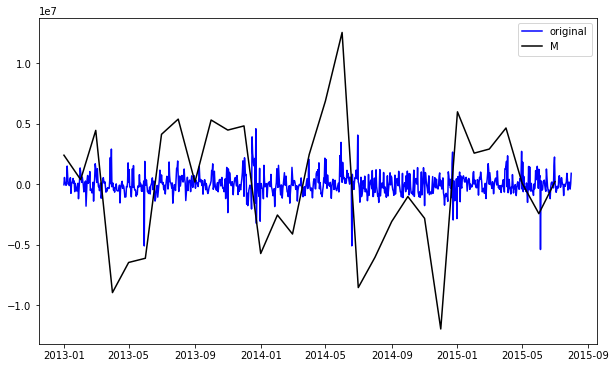

In [25]:
resid = plt.plot(residual, color='blue', label='original')
resid_m = plt.plot(residual_m, color='black', label='M')
plt.legend(loc="best")
plt.show(block = False)

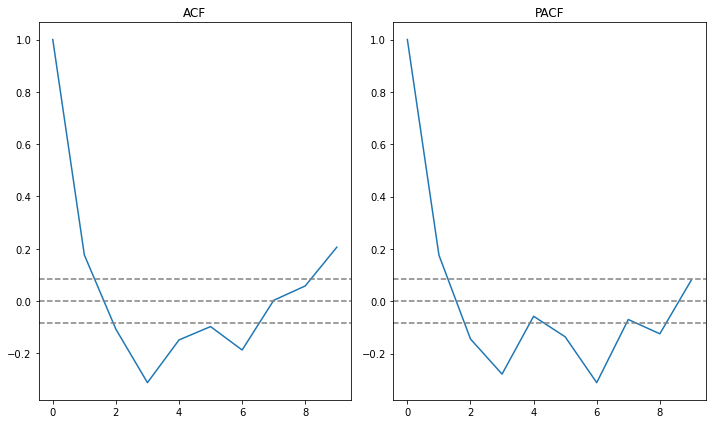

In [26]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(residual_m, nlags=9)
lag_pacf = pacf(residual_m, nlags=9, method='ols')

#plotting
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("ACF")


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("PACF")
plt.tight_layout() 

plotting AR Model


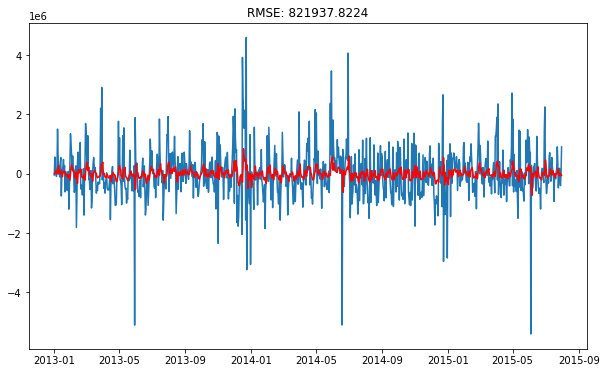

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#AR|I|MA Model
model_3 = ARIMA(residual, order=(2,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual['y'])**2)))
print('plotting AR Model')

In [29]:
resid_ = results_3.fittedvalues.to_list()
resid_pred = residual.copy()
resid_pred['y'] = resid_
resid_pred.reset_index(inplace=True)
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])
resid_pred['ds'] = resid_pred['ds'].apply(lambda x: x.strftime('%Y-%m'))
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])
resid_pred = resid_pred.groupby('ds').sum()
resid_pred.reset_index(inplace = True)
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])

#resid_pred.columns=['ds','y'] 
resid_pred.set_index('ds', inplace=True)
resid_pred

,y
ds,
2013-01-01,2.158122e+05
2013-02-01,-9.594826e+03
2013-03-01,1.276473e+06
2013-04-01,-2.384171e+06
2013-05-01,-9.391887e+05
2013-06-01,-1.922987e+06
2013-07-01,5.072946e+05
2013-08-01,1.841104e+06
2013-09-01,2.356575e+05


In [30]:
residual_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2013-01-01 to 2015-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


plotting AR Model


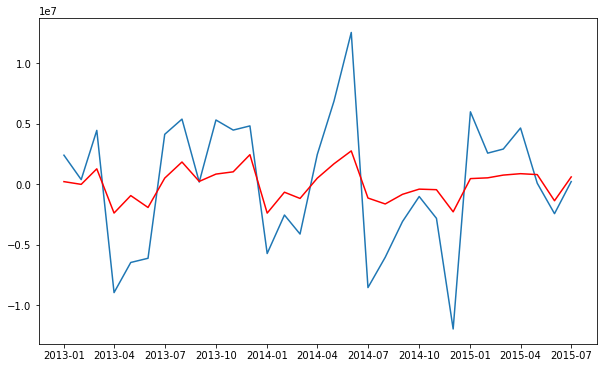

In [31]:
plt.plot(residual_m)
plt.plot(resid_pred, color="red")
#plt.title('RMSE: %.4f'% np.sqrt(np.mean((resid_pred - residual_m)**2)))
print('plotting AR Model')

plotting AR Model


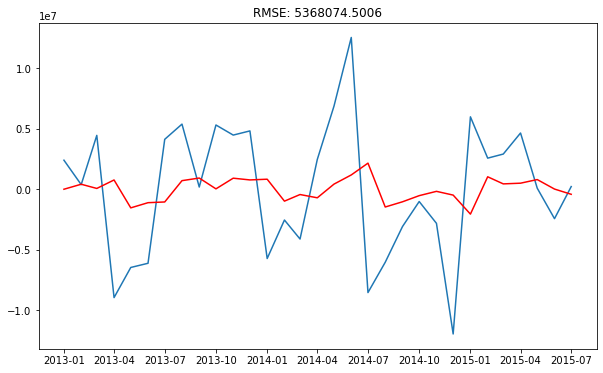

In [33]:
from statsmodels.tsa.arima_model import ARIMA

#AR|I|MA Model
model_3 = ARIMA(residual_m, order=(1,0,0))
results_3 = model_3.fit()
plt.plot(residual_m)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual_m['y'])**2)))
print('plotting AR Model')

## AutoReg

In [34]:
from statsmodels.tsa.ar_model import AutoReg

In [35]:
indexed_sales

,y
ds,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [36]:
#create lagged dataset
values = indexed_sales
residual_shift = pd.concat([values.shift(1), values], axis=1)
residual_shift.columns = ['t-1', 't+1']

In [37]:
# split into train and test sets
X = residual_shift.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [38]:
# persistence model
predictions = [x for x in test_X]

In [232]:
model_AR = AutoReg(endog=residual_m, lags= 12, trend= 'n' ,seasonal=False)
model_fit = model_AR.fit()
coef = model_fit.params
print('Coef=%s' % (coef))

Coef=intercept   -5.670604e+06
trend        2.639383e+05
y.L1         8.670666e-02
y.L2         7.848371e-02
y.L3        -2.570705e-01
y.L4         1.104890e-01
y.L5         1.867692e-01
y.L6        -4.695227e-01
y.L7         2.497134e-01
y.L8         1.284106e-01
y.L9        -5.122255e-01
y.L10        2.724225e-01
y.L11        1.707115e-01
y.L12       -9.701088e-01
dtype: float64


In [40]:
#calculate residuals
residuals_calculate = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals_calculate

[-547542.0,
 333775.0,
 59682.0,
 -1628585.0,
 -4675345.0,
 5288982.0,
 -344586.0,
 121260.0,
 986878.0,
 -165481.0,
 -2584017.0,
 -3308654.0,
 9740052.0,
 -1772506.0,
 -688286.0,
 -308943.0,
 114223.0,
 -1668858.0,
 -5451649.0,
 7917532.0,
 -1012161.0,
 -396789.0,
 63824.0,
 314705.0,
 -1488456.0,
 -5372976.0,
 5646282.0,
 -482198.0,
 -478772.0,
 687113.0,
 240636.0,
 -293986.0,
 -5324230.0,
 8822017.0,
 -1151557.0,
 -350475.0,
 349227.0,
 1305212.0,
 -1867175.0,
 -7063491.0,
 10034915.0,
 -1433149.0,
 -585803.0,
 296023.0,
 1247814.0,
 -3322455.0,
 -6282932.0,
 6363546.0,
 -230286.0,
 -419927.0,
 247142.0,
 344267.0,
 278015.0,
 -6560556.0,
 11914711.0,
 -1512321.0,
 -1137674.0,
 324826.0,
 -289723.0,
 -1562078.0,
 -7697163.0,
 10748393.0,
 -295517.0,
 -6099408.0,
 -4457330.0,
 49852.0,
 5505054.0,
 -5492221.0,
 7073355.0,
 374317.0,
 -3770152.0,
 -3765429.0,
 7431269.0,
 -1411120.0,
 -5953118.0,
 11106612.0,
 -4512324.0,
 1830376.0,
 -975212.0,
 298742.0,
 -1667645.0,
 -6094375.0,
 

In [235]:
resid_pred = model_AR.predict(residual_m[:14])

In [187]:
np.asarray(residual_df)

array([['2013-01-01', -45789.8527232334],
       ['2013-01-02', 560386.6259758789],
       ['2013-01-03', 135063.5460880194],
       ...,
       ['2015-07-29', -401909.1186384224],
       ['2015-07-30', 34640.67311879061],
       ['2015-07-31', 903958.2277923116]], dtype=object)

In [239]:
rmse = np.sqrt(mean_squared_error(residual_m[12:31]["y"], resid_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 143831131810391.781


In [240]:
residual_m[12:31]["y"]

ds
2014-01-01   -5.735044e+06
2014-02-01   -2.547818e+06
2014-03-01   -4.121888e+06
2014-04-01    2.466673e+06
2014-05-01    6.884857e+06
2014-06-01    1.256501e+07
2014-07-01   -8.554430e+06
2014-08-01   -6.045197e+06
2014-09-01   -3.088938e+06
2014-10-01   -1.016790e+06
2014-11-01   -2.823210e+06
2014-12-01   -1.198169e+07
2015-01-01    5.995857e+06
2015-02-01    2.574657e+06
2015-03-01    2.913469e+06
2015-04-01    4.655767e+06
2015-05-01    8.581153e+04
2015-06-01   -2.435898e+06
2015-07-01    2.209394e+05
Name: y, dtype: float64

In [241]:
resid_pred.index = residual_m[12:31]["y"].index

plotting AR Model


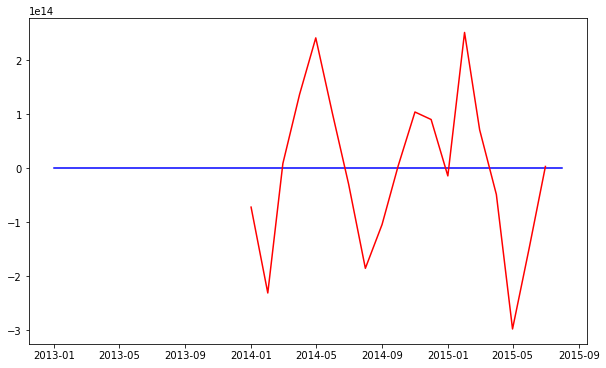

In [242]:
plt.plot(residual, color="blue")
plt.plot(resid_pred, color="red")
#plt.title('RMSE: %.4f'% np.sqrt(np.mean((resid_pred - residual)**2)))
print('plotting AR Model')

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [264]:

model_AR = AutoReg(np.sqrt)residual, lags = 365,seasonal=False, trend = 'n')
model_AR.fit()
prediction = model_AR.predict(residual[577:])
prediction

2014-01-01    8.819606e+12
2014-01-02    1.540943e+13
2014-01-03   -1.549099e+13
2014-01-04   -7.373759e+12
2014-01-05   -1.809857e+13
                  ...     
2015-07-27    7.376678e+12
2015-07-28    1.540527e+13
2015-07-29   -2.013107e+12
2015-07-30    1.544735e+13
2015-07-31    1.155002e+13
Freq: D, Length: 577, dtype: float64

# Final models

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR|I|MA Model
model_3 = ARIMA(residual, order=(2,0,0))
results_3 = model_3.fit()
plt.plot(residual)
plt.plot(results_3.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_3.fittedvalues - residual['y'])**2)))
print('plotting AR Model')

In [ ]:
resid_ = results_3.fittedvalues.to_list()
resid_pred = residual.copy()
resid_pred['y'] = resid_
resid_pred.reset_index(inplace=True)
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])
resid_pred['ds'] = resid_pred['ds'].apply(lambda x: x.strftime('%Y-%m'))
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])
resid_pred = resid_pred.groupby('ds').sum()
resid_pred.reset_index(inplace = True)
resid_pred['ds'] = pd.to_datetime(resid_pred['ds'])

#resid_pred.columns=['ds','y'] 
resid_pred.set_index('ds', inplace=True)
resid_pred

In [ ]:
plt.plot(residual_m)
plt.plot(resid_pred, color="red")
#plt.title('RMSE: %.4f'% np.sqrt(np.mean((resid_pred - residual_m)**2)))
print('plotting AR Model')